# Make with database: Social Media Usage and Emotional Well-Being
- Link: https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being/data

# Connecting gg drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_dataset = "/content/drive/MyDrive/Class/nam-4/ky-1/ML/TH2/Dataset"

Mounted at /content/drive


# Importing the libraries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Importing the data

In [ ]:
train_df = pd.read_csv(path_dataset + "/ANN/train.csv")
test_df = pd.read_csv(path_dataset + "/ANN/test.csv")
val_df = pd.read_csv(path_dataset + "/ANN/val.csv", on_bad_lines='skip')

In [ ]:
train_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


# Understanding the data

In [ ]:
# Display the structure of the training data
print("Information about the training data:")
train_df.info()

# Display summary statistics
print("\nSummary statistics of the training data:")
train_df.describe()

# Check for missing values
print("\nMissing values in the training data:")
train_df.isnull().sum()

Information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB

Summary statistics of the training data:

Missing values in the training data:


,0
User_ID,0
Age,0
Gender,1
Platform,1
Daily_Usage_Time (minutes),1
Posts_Per_Day,1
Likes_Received_Per_Day,1
Comments_Received_Per_Day,1
Messages_Sent_Per_Day,1
Dominant_Emotion,1


# Data Preprocessing

In [ ]:
# Data preparation
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce')
train_df['gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1,'21':2,'22':2,'23':2,'24':2,'25':2,'26':2,'27':2,'28':2,'29':2,'30':2,'31':2,'32':2,'33':2,'34':2,'35':2,'Non-binary':3})
test_df['gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1,'21':2,'22':2,'23':2,'24':2,'25':2,'26':2,'27':2,'28':2,'29':2,'30':2,'31':2,'32':2,'33':2,'34':2,'35':2,'Non-binary':3})
train_df['dominant_emotion'] = train_df['Dominant_Emotion'].map({'Happiness':0, 'Neutral': 1,'Anxiety':2 ,'Sadness':3,'Boredom':4,'Anger':5})
test_df['dominant_emotion'] = test_df['Dominant_Emotion'].map({'Happiness':0, 'Neutral': 1,'Anxiety':2 ,'Sadness':3,'Boredom':4,'Anger':5})
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
a = train_df.drop(['User_ID','Gender','Dominant_Emotion'],axis=1)
b = test_df.drop(['User_ID','Gender','Dominant_Emotion'],axis=1)
tr_dummy = pd.get_dummies(a,drop_first=True)
ts_dummy = pd.get_dummies(b,drop_first=True)
x_tr = tr_dummy.drop(['dominant_emotion'],axis=1)
x_ts = ts_dummy.drop(['dominant_emotion'],axis=1)
y_tr = tr_dummy['dominant_emotion']
y_ts = ts_dummy['dominant_emotion']
y_ts.head()

,dominant_emotion
0,1
1,1
2,2
3,2
4,1


In [ ]:
x_tr

,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,gender,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,25.0,120.0,3.0,45.0,10.0,12.0,1.0,True,False,False,False,False,False
1,30.0,90.0,5.0,20.0,25.0,30.0,0.0,False,False,False,False,True,False
2,22.0,60.0,2.0,15.0,5.0,20.0,3.0,False,False,False,False,False,False
3,28.0,200.0,8.0,100.0,30.0,50.0,1.0,True,False,False,False,False,False
4,33.0,45.0,1.0,5.0,2.0,10.0,0.0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,33.0,85.0,4.0,35.0,18.0,18.0,3.0,False,False,False,False,True,False
997,22.0,70.0,1.0,14.0,6.0,10.0,1.0,False,False,False,False,False,False
998,35.0,110.0,3.0,50.0,25.0,25.0,0.0,False,False,False,False,False,True
999,28.0,60.0,2.0,18.0,8.0,18.0,3.0,False,False,False,True,False,False


# Standardize the features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_tr)
X_test = scaler.transform(x_ts)

In [ ]:
X_train

array([[-0.6346241 ,  0.60424035, -0.18027936, ..., -0.2818497 ,
        -0.50540556, -0.2818497 ],
       [ 0.6346241 , -0.16092833,  0.85116418, ..., -0.2818497 ,
         1.97860901, -0.2818497 ],
       [-1.39617302, -0.92609702, -0.69600113, ..., -0.2818497 ,
        -0.50540556, -0.2818497 ],
       ...,
       [ 1.90387231,  0.34918412, -0.18027936, ..., -0.2818497 ,
        -0.50540556,  3.54799032],
       [ 0.12692482, -0.92609702, -0.69600113, ...,  3.54799032,
        -0.50540556, -0.2818497 ],
       [-0.12692482,  0.60424035,  0.33544241, ..., -0.2818497 ,
        -0.50540556, -0.2818497 ]])

# Build ANN model

In [ ]:
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=8, activation='relu'))

# Add output layer
model.add(Dense(units=6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> Bởi vì output là phân loại đa nhãn nên dùng hàm kích hoạt: softmax

In [ ]:
# Train the model on the training data
model.fit(X_train, y_tr, validation_split=0.2, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2073 - loss: 1.7181 - val_accuracy: 0.2649 - val_loss: 1.6090
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2278 - loss: 1.6234 - val_accuracy: 0.3189 - val_loss: 1.5253
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3462 - loss: 1.4990 - val_accuracy: 0.3568 - val_loss: 1.4711
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4241 - loss: 1.4663 - val_accuracy: 0.4811 - val_loss: 1.4080
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 1.3830 - val_accuracy: 0.5135 - val_loss: 1.3233
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5651 - loss: 1.2886 - val_accuracy: 0.5351 - val_loss: 1.2464
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5451 - loss: 1.2408 - val_accuracy: 0.5568 - val_loss: 1.2024
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5439 - loss: 1.2170 - val_accuracy: 0.5568 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


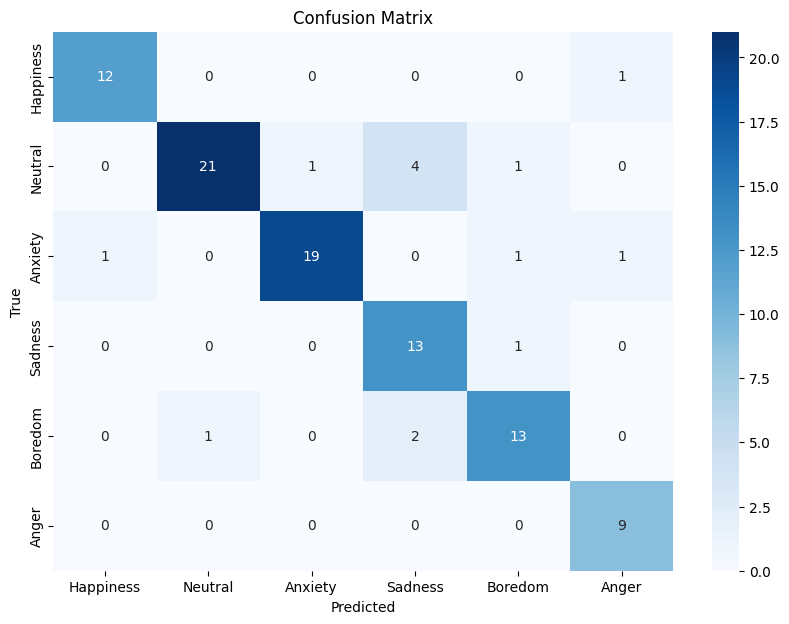

In [ ]:
# Predict the classes on the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_ts, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Happiness', 'Neutral', 'Anxiety', 'Sadness', 'Boredom', 'Anger'], yticklabels=['Happiness', 'Neutral', 'Anxiety', 'Sadness', 'Boredom', 'Anger'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()